In [19]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon


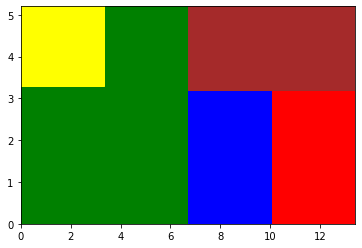

In [20]:
# Criando sala hipotetica para testes de localização

ax = plt.figure().add_subplot(111)
  
area_trabalho = matplotlib.patches.Rectangle((0, 0), 2.75, 3.30,color ='green')
area_trabalho2 = matplotlib.patches.Rectangle((2.75, 0), 3.95, 5.2,color ='green')
copa = matplotlib.patches.Rectangle((0, 3.3), 3.35, 2.7,color ='yellow')
sala_socios = matplotlib.patches.Rectangle((6.7, 0), 3.35, 3.2,color ='blue')
sala_reuniao = matplotlib.patches.Rectangle((10.05, 0), 3.35, 3.2,color ='red')
cafe = matplotlib.patches.Rectangle((6.7, 3.2), 6.7, 2.7,color ='brown')

ax.add_patch(area_trabalho)
ax.add_patch(area_trabalho2)
ax.add_patch(copa)
ax.add_patch(sala_socios)
ax.add_patch(sala_reuniao)
ax.add_patch(cafe)
  
plt.xlim([0, 13.4])
plt.ylim([0, 5.2])
  
plt.show()

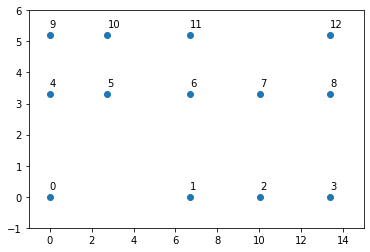

In [21]:
# Definindo vertices chaves para definição de cada sala individualmente

sala_blue = [
    [0,0], [6.7, 0], [10.05, 0], [13.4, 0], 
    [0, 3.3], [2.75, 3.3], [6.7, 3.3], [10.05, 3.3], [13.4, 3.3],
    [0, 5.2], [2.75, 5.2], [6.7, 5.2], [13.4, 5.2]
]
np_sala_blue = np.array(sala_blue)
x_list = np_sala_blue[:,0]
y_list = np_sala_blue[:,1]

plt.clf()
plt.plot(x_list, y_list, 'o')

for i in range(13):
    plt.text(x_list[i], y_list[i]+0.25, str(i))

plt.xlim([-1, 15])
plt.ylim([-1, 6])
plt.show()

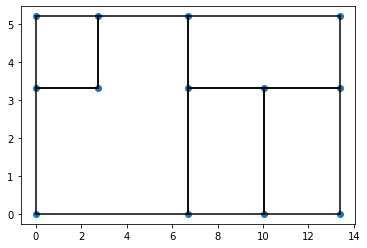

In [34]:
# Conectando os pontos para testar se os pontos chaves representam todos os poligonos

def connectpoints(p1,p2):
    x1, x2 = x_list[p1], x_list[p2]
    y1, y2 = y_list[p1], y_list[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

def connecting(p):
    points = p + [p[0]]
    for p in range(len(points)-1):
        connectpoints(points[p], points[p+1])

# Criando metodo para poder trazer essa figura em outras celulas
def base_fig():
    plt.plot(x_list, y_list, 'o')
    connecting(pontos_cafe)
    connecting(pontos_sala_reuniao)
    connecting(pontos_sala_socios)
    connecting(pontos_copa)
    connecting(pontos_area_trabalho)

pontos_cafe = [6,11,12,8]
pontos_sala_reuniao = [2,7,8,3]
pontos_sala_socios = [1,6,7,2]
pontos_copa = [4,9,10,5]
pontos_area_trabalho = [0,1,6,11,10,5,4]

base_fig()
plt.savefig('base_fig.png')
plt.show()

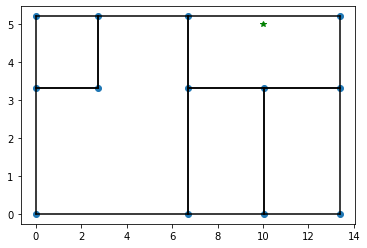

fora de sala_reuniao
fora de copa
dentro de cafe
fora de area_trabalho
fora de sala_socios


In [38]:
# Definindo poligonos para testar em qual cômodo um ponto se encontra 
base_fig()
polygons = {
    "sala_reuniao": Polygon([sala_blue[i] for i in pontos_sala_reuniao]),
    "copa": Polygon([sala_blue[i] for i in pontos_copa]),
    "cafe": Polygon([sala_blue[i] for i in pontos_cafe]),
    "area_trabalho": Polygon([sala_blue[i] for i in pontos_area_trabalho]),
    "sala_socios": Polygon([sala_blue[i] for i in pontos_sala_socios]),
}
p1 = Point(10,5) 
plt.plot(p1.x, p1.y, 'g*')
plt.show()

# Existem nuancias a serem tratadas aqui, ex: ponto p1 no mesmo local que um ponto chave
for polygon_name, polygon in polygons.items():
    if polygon.contains(p1):
        print(f'dentro de {polygon_name}')
        continue
    print(f'fora de {polygon_name}')
